### Import Libraries

In [4]:
# Python Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import SGD, Adam

warnings.filterwarnings("ignore")
%matplotlib inline

<!--  -->

### Sample Data

- **Train and Test Data Splits**

In [5]:
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = tf.keras.datasets.mnist.load_data()

<!--  -->

### Data Preprocessing

- **Flatten Image: Raw Image -> 1D Array**

In [6]:
X_train_images = X_train_images.reshape([-1, 28, 28, 1]).astype("float32") # 28(rows), 28(cols), 1(RGB dimension)
X_test_images = X_test_images.reshape([-1, 28, 28, 1]).astype("float32")

- **Normalization**

In [7]:
X_train_images = X_train_images / 255.0
X_test_images = X_test_images / 255.0

- **Dummy Variables Creation**

In [8]:
y_train_labels = tf.keras.utils.to_categorical(y_train_labels, 10)
y_test_labels = tf.keras.utils.to_categorical(y_test_labels, 10)

<!--  -->

### Build Model

In [9]:
def build_model(activation, initializer):
    model = Sequential()
    # Conv2D(10, kernel_size=(3, 3), ...): Adds a 2D convolutional layer with 10 filters, each of size 3x3.
    model.add(Conv2D(10, kernel_size=(3,3), activation=activation, input_shape=(28, 28, 1), kernel_initializer=initializer))
    # MaxPooling2D(pool_size=(2, 2)): Adds a max pooling layer to downsample the input by taking the maximum value over a 2x2 pooling window. This reduces the spatial dimensions of the output volume.
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Adds another convolutional layer with 5 filters, each of size 3x3, using the same activation function and kernel initializer as specified before.
    model.add(Conv2D(5, kernel_size=(3,3), activation=activation, kernel_initializer=initializer))
    # Adds another max pooling layer to further downsample the input.
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Flatten(): Flattens the input. This layer converts the 2D matrix of the feature map to a 1D vector, making it suitable for the fully connected layers.
    model.add(Flatten())
    # Dense(20, ...): Adds a dense (fully connected) layer with 128 neurons.
    model.add(Dense(20, activation=activation, kernel_initializer=initializer))
    # Dropout(0.5): Adds a dropout layer with a dropout rate of 0.5. During training, this layer randomly sets 50% of the input units to 0 at each update to prevent overfitting.
    model.add(Dropout(0.5))
    # activation="softmax": Uses the softmax activation function, which outputs a probability distribution over the 10 classes, ensuring the sum of the outputs is 1.
    model.add(Dense(10, activation="softmax", kernel_initializer=initializer))
    return model

<!--  -->

### Train and Evaluate Model

In [17]:
def train_and_evaluate(activation, optimizer_class, learning_rate, initializer,
                        X_train_images, y_train_labels,
                        X_test_images, y_test_labels,
                        num_epochs):
    model = build_model(activation, initializer)
    optimizer = optimizer_class(learning_rate=learning_rate, clipnorm=1.0) # Using gradient clipping with norm
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(X_train_images, y_train_labels,
                        epochs=num_epochs, batch_size=100,
                        validation_data=(X_test_images, y_test_labels),
                        verbose=1)
    test_loss, test_accuracy = model.evaluate(X_test_images, y_test_labels, verbose=1)
    return model, history.history["loss"], test_loss, test_accuracy

<!--  -->

### Loss Over Epochs

In [19]:
def plot_loss(num_epochs, losses, title):
    sns.set_style("dark")
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs+1), losses, "b", label="Train Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(title)
    plt.legend()
    plt.show()

<!--  -->

### Weights Initialization

In [13]:
initializer = tf.keras.initializers.HeNormal()

<!--  -->

### Model Hyperparameters

In [12]:
num_epochs = 10
activations = ["relu"]
optimizer_specs = {
    "SGD": {SGD, 0.05}
}

<!--  -->

### Execute Training

Training model with {activation} activation and {opt_name} optimizer...
Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3563 - loss: 1.7676 - val_accuracy: 0.8984 - val_loss: 0.4337
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7091 - loss: 0.8311 - val_accuracy: 0.9256 - val_loss: 0.2738
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7580 - loss: 0.6833 - val_accuracy: 0.9288 - val_loss: 0.2300
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7732 - loss: 0.6332 - val_accuracy: 0.9363 - val_loss: 0.2082
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7892 - loss: 0.5896 - val_accuracy: 0.9421 - val_loss: 0.1906
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7971 - loss: 0.5591 - val_accuracy: 0.9503 - val_loss: 0.1665
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8086 - loss: 0.5258 - val_accuracy: 0.9537 - val_loss: 0.1567
Epoch 8/10
600/600 ━━━━━━━━━━━━━

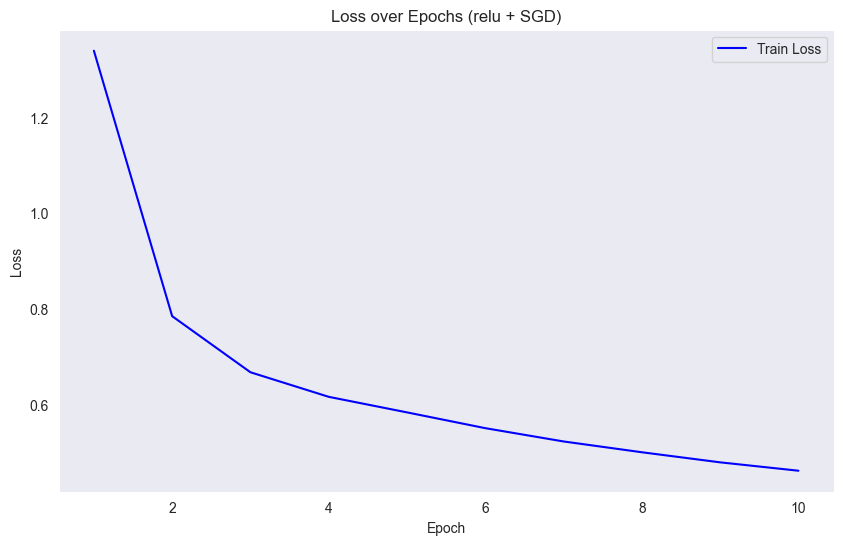


 Test Accuracy with relu activation and SGD optimizer:  0.96


In [20]:
for activation in activations:
    
    for opt_name, (optimizer_class, learning_rate) in optimizer_specs.items():
        
        print("Training model with {activation} activation and {opt_name} optimizer...")
        model, train_losses, test_losses, test_accuracy = train_and_evaluate(activation, 
                                                            optimizer_class, 
                                                            learning_rate,
                                                            initializer,
                                                            X_train_images, 
                                                            y_train_labels,
                                                            X_test_images, 
                                                            y_test_labels,
                                                            num_epochs)
        
        # Train Loss
        plot_loss(num_epochs, train_losses, f"Loss over Epochs ({activation} + {opt_name})")
        
        # Test Accuracy 
        print(f"\n Test Accuracy with {activation} activation and {opt_name} optimizer: {test_accuracy: .2f}")

<!--  -->

### Model Prediction

In [21]:
# Test Prediction on One Image
index = np.random.randint(0, X_test_images.shape[0])
test_image = X_test_images[index]
true_label = np.argmax(y_test_labels[index])

# Add batch dimension (1, 28, 28, 1)
test_image_batch = np.expand_dims(test_image, axis=0)

# Make prediction
prediction = model.predict(test_image_batch)
prediction_label = np.argmax(prediction)

print(f"\nTrue Label: {true_label}")
print(f"\nPrediction Label: {prediction_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step

True Label: 6

Prediction Label: 6


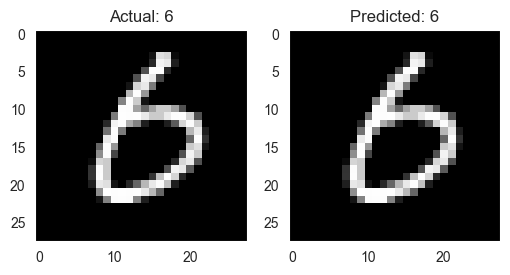

In [22]:
# Plot actual image vs predicted label
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(test_image.squeeze(), cmap="gray")
plt.title(f"Actual: {true_label}")

plt.subplot(1, 2, 2)
plt.imshow(test_image.squeeze(), cmap="gray")
plt.title(f"Predicted: {prediction_label}")

plt.show()